<a href="https://colab.research.google.com/github/suzysuyeonhur/IOD_lab_work/blob/main/Linear_Regression_Lab_4_1_2_020623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [4]:
# Read CSV
import pandas as pd

house_csv = "Sacramento_transactions.csv"
df = pd.read_csv(house_csv)

In [5]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [6]:
df.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [7]:
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [9]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


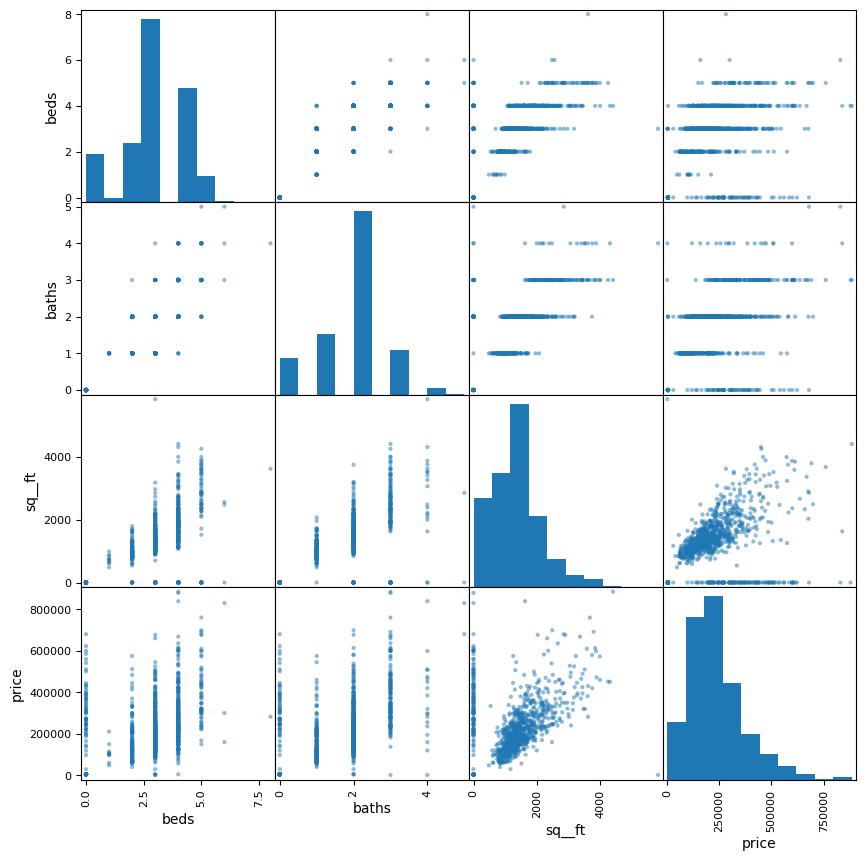

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the variables to visualize
variables = ['beds', 'baths', 'sq__ft', 'price']

# Create scatter plots for each pair of variables
pd.plotting.scatter_matrix(df[variables], figsize=(10, 10))
plt.show()


In [15]:
# Geographic Analysis

import pandas as pd
import folium

# Read the dataset
df = pd.read_csv('Sacramento_transactions.csv')

# Create a map centered at Sacramento
m = folium.Map(location=[38.5816, -121.4944], zoom_start=11)

# Add markers for each transaction location
for index, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['street'],
        icon=folium.Icon(color='blue', icon='home')
    ).add_to(m)

# Display the map
m


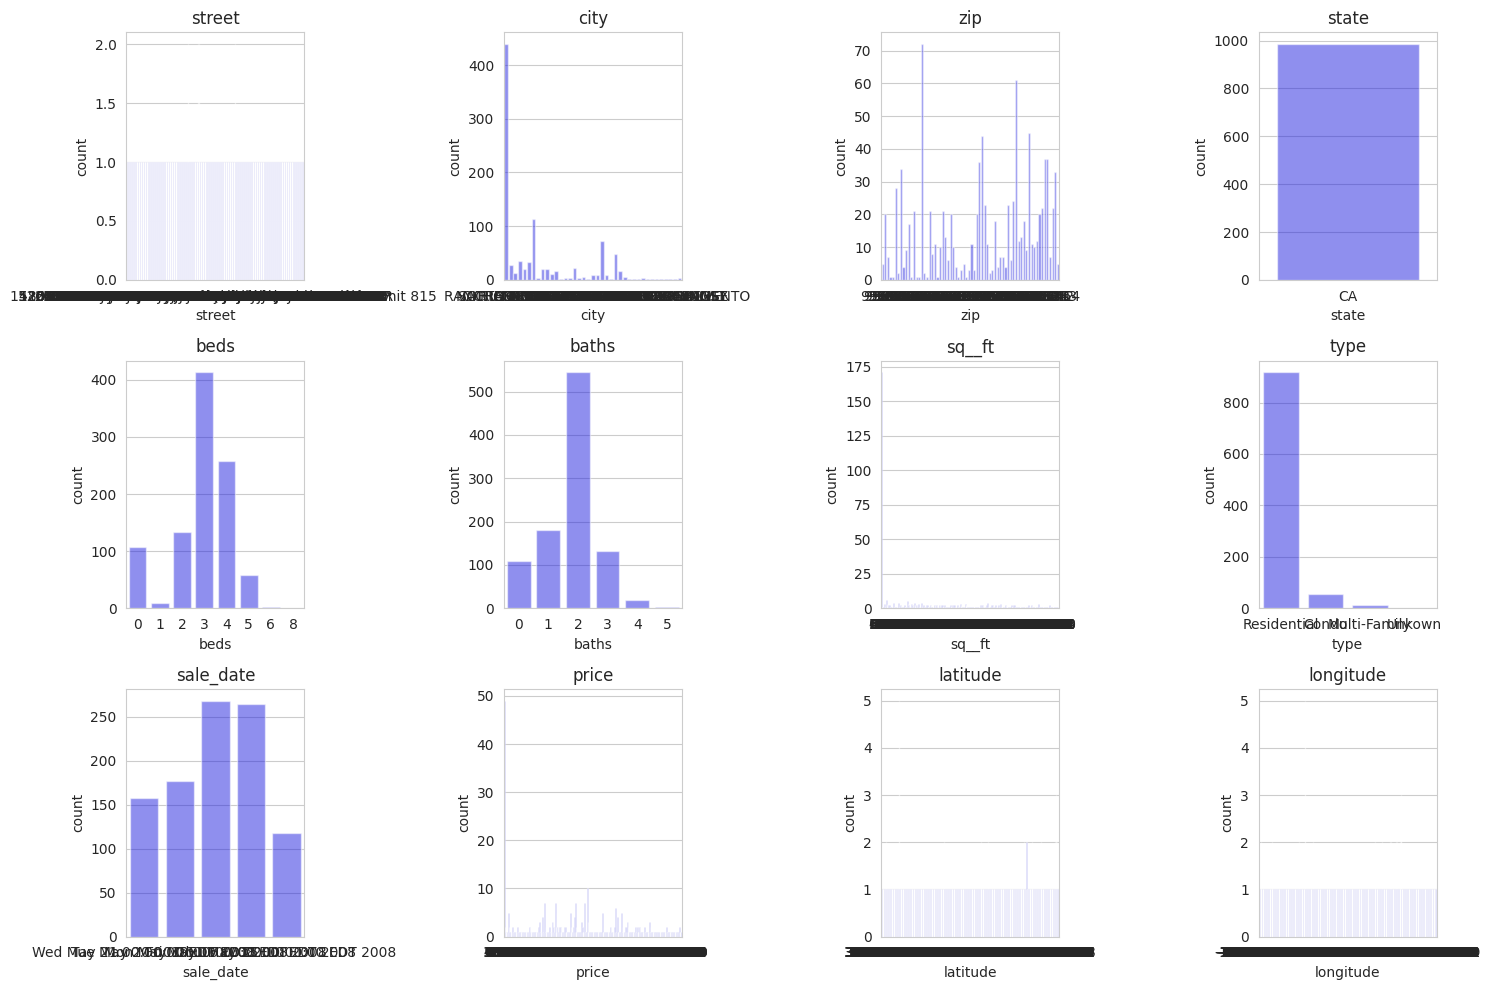

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn plot
sns.set_style("whitegrid")

# Create subplots for each column
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Iterate over each column
for i, column in enumerate(df.columns):
    # Select the subplot for the column
    ax = axes[i // 4, i % 4]
    # Create a count plot for the column
    sns.countplot(x=df[column], ax=ax, color='blue', alpha=0.5)
    # Set the title for the subplot
    ax.set_title(column)

# Adjust the layout of subplots
plt.tight_layout()

# Display the plot
plt.show()


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [19]:
# ANSWER
# Set 'price' as the target variable
target_variable = df['price']


#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [20]:
# ANSWER
# List of all possible independent/predictor variables
independent_variables = ['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type', 'sale_date', 'latitude', 'longitude']

# Print the list of independent variables
print("List of possible independent/predictor variables:")
for variable in independent_variables:
    print(variable)


List of possible independent/predictor variables:
street
city
zip
state
beds
baths
sq__ft
type
sale_date
latitude
longitude


#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [22]:
# ANSWER
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find the correlation of each variable with the target variable (price)
correlation_with_price = correlation_matrix['price'].abs().sort_values(ascending=False)

# Print the correlation values
print("Correlation with Price:")
print(correlation_with_price)

correlation_matrix = df.corr(numeric_only=True)

Correlation with Price:
price        1.000000
baths        0.416208
beds         0.342024
sq__ft       0.333897
longitude    0.284485
zip          0.093353
latitude     0.039573
Name: price, dtype: float64


<ipython-input-22-d8d319ec3173>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


The variable baths has the highest correlation coefficient with the target variable price.
A correlation coefficient of 0.416208 indicates a moderately strong positive linear relationship between the number of bathrooms and the price of the house.
As the number of bathrooms increases, the price of the house tends to increase as well.
The correlation analysis suggests that baths is a significant predictor of the house price.

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [23]:
from sklearn.linear_model import LinearRegression

In [26]:
# Define the independent variable matrix X and target variable array y
X = df[['baths', 'beds', 'sq__ft', 'longitude', 'zip', 'latitude']]
y = df['price']

# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficient(s)
coefficients = model.coef_

# Get the intercept
intercept = model.intercept_

# Predict using the trained model
y_pred = model.predict(X)

# Calculate the R-squared score
r2_score = model.score(X, y)


##### 2.4.1 Fit predictor and target variables using linear regression 

In [28]:
# ANSWER

X = df['sq__ft'].values.reshape(-1,1)
Y = df['price']

In [29]:
from sklearn.linear_model import LinearRegression

# Reshape the independent variable X
X = df['sq__ft'].values.reshape(-1, 1)

# Define the target variable Y
Y = df['price']

# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Get the coefficient(s)
coefficients = model.coef_

# Get the intercept
intercept = model.intercept_

# Predict using the trained model
Y_pred = model.predict(X)

# Calculate the R-squared score
r2_score = model.score(X, Y)

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [30]:
# ANSWER

from sklearn.linear_model import LinearRegression

# Reshape the independent variable X
X = df['sq__ft'].values.reshape(-1, 1)

# Define the target variable Y
Y = df['price']

# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Calculate the R-squared score
r2_score = model.score(X, Y)

print("R-squared score:", r2_score)


R-squared score: 0.11148717682951437


### 3. Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [31]:
# ANSWER
## Create training and testing subsets

from sklearn.model_selection import train_test_split

# Define the independent variable(s) X
X = df[['baths', 'beds', 'sq__ft', 'longitude', 'zip', 'latitude']]

# Define the target variable y
y = df['price']

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Print the shape of the training and testing subsets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (659, 6) (659,)
Testing data shape: (326, 6) (326,)


#### 3.2 Check Shape, Sample of Test Train Data

In [32]:
# ANSWER
## Check training/test data


# Check the shape of the training and testing subsets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

# Print a sample of the training data
print("Sample of training data:")
print(X_train.head())

# Print a sample of the testing data
print("Sample of testing data:")
print(X_test.head())


Training data shape: (659, 6) (659,)
Testing data shape: (326, 6) (326,)
Sample of training data:
     baths  beds  sq__ft   longitude    zip   latitude
433      2     3    1758 -121.306479  95678  38.756149
172      1     3    1643 -121.373916  95864  38.588672
125      3     4    2354 -121.430224  95757  38.403492
541      3     3       0 -121.203600  95677  38.777585
879      2     3    1354 -121.463157  95823  38.484374
Sample of testing data:
     baths  beds  sq__ft   longitude    zip   latitude
613      1     2     906 -121.428794  95823  38.459002
451      4     5    2382 -121.277844  95670  38.603686
731      2     3    1962 -121.435296  95823  38.443305
436      3     4    1739 -121.416821  95758  38.417026
275      2     3    1527 -121.255937  95628  38.664552


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [33]:
# ANSWER
# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train, y_train)

# Calculate the score using the testing data
score = model.score(X_test, y_test)

# Print the score
print("Score:", score)


Score: 0.22796881789440282


In [ ]:
# ANSWER

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [37]:
# Create a new data point with the features of the house
new_house = pd.DataFrame({
    'street': ['1140 EDMONTON DR'],
    'city': ['SACRAMENTO'],
    'zip': [95833],
    'state': ['CA'],
    'beds': [3],
    'baths': [2],
    'sq__ft': [1204],
    'type': ['Residential']
})

# One-hot encode the categorical variables in the new house data
new_house_encoded = pd.get_dummies(new_house)

# Get the missing columns in the new house data that were present during training
missing_columns = set(X.columns) - set(new_house_encoded.columns)

# Add the missing columns to the new house data with default values of 0
for column in missing_columns:
    new_house_encoded[column] = 0

# Ensure the column order in the new house data matches the column order during training
new_house_encoded = new_house_encoded[X.columns]

# Use the trained linear regression model to predict the price of the new house
predicted_price = model.predict(new_house_encoded)

# Print the predicted price
print("Predicted price:", predicted_price)


Predicted price: [46329728.51132604]


The predicted price for the new house is $46,329,728.51
This predicted price seems extremely high and unrealistic
The model may have encountered an issue due to data mismatch or improper preprocessing
It is recommended to revisit the data and the preprocessing steps to identify any potential errors
Further investigation and refinement of the model are necessary to obtain accurate predictions

#### Find the error

In [42]:
# Predict the house prices using the trained model
predicted_prices = model.predict(X_test)

# Calculate the residuals
residuals = predicted_prices - y_test


# Identify outliers based on the residuals
outliers = residuals[np.abs(residuals) > 2 * np.std(residuals)]

# Print the outliers
print("Outliers:")
print(outliers)


Outliers:
865    278007.120387
848   -411110.437105
859   -450084.954823
310   -380975.393665
853   -413015.910831
836   -322556.509219
819   -268981.625081
286   -258685.120435
823   -281404.234632
333   -465869.713464
552   -283263.451168
549   -345483.698813
828   -295147.179943
334   -434290.939252
331   -422931.867972
857   -314570.051276
545   -279252.362865
327   -378570.635954
133   -297007.499048
Name: price, dtype: float64


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, predicted_prices)
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))

# Print the performance metrics
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 98066.3895116464
Root Mean Squared Error: 130134.02478548037


The mean absolute error (MAE) of 98,066.39 and root mean squared error (RMSE) of 130,134.02 indicate, on average, the difference between the predicted house prices and the actual prices is around $98,066.39 and $130,134.02, respectively.

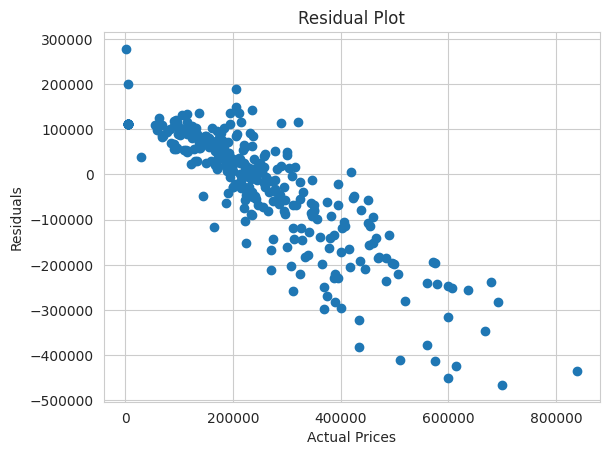

In [43]:
import matplotlib.pyplot as plt

# Plot the residuals
plt.scatter(y_test, residuals)
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



